In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Data Exploration

In [38]:
dataset.shape

(400, 3)

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## Missing values

In [40]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

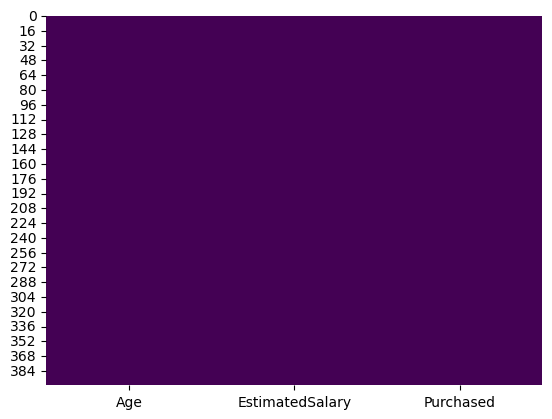

In [41]:
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')

## Unique values

In [42]:
dataset['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## Dependent & Independent Variables

In [43]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [44]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [45]:
y = y.reshape(len(y), 1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Test & Training data split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (320, 2)
X_test shape: (80, 2)
y_train shape: (320, 1)
y_test shape: (80, 1)


## Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [49]:
X_train

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

In [50]:
X_test

array([[-0.74651519,  0.33929263],
       [-1.48154554, -1.59952242],
       [-0.01148485, -0.52883351],
       [-0.74651519,  0.10779233],
       [ 1.55045463, -0.03689536],
       [ 0.90730308, -1.48377227],
       [-1.29778795,  0.3103551 ],
       [-0.83839399, -1.13652181],
       [ 0.26415153, -0.32627074],
       [-0.10336364,  1.58360677],
       [-1.20590916, -1.39695965],
       [-1.38966674, -1.2812095 ],
       [-0.47087881,  1.32316893],
       [ 0.7235455 ,  0.22354248],
       [-0.19524244, -0.35520828],
       [-0.37900002, -0.81820889],
       [-1.66530312, -0.03689536],
       [ 2.10172739, -0.84714643],
       [ 1.45857584,  0.02097972],
       [-1.02215157, -0.81820889],
       [-0.01148485,  0.19460494],
       [ 0.7235455 , -0.76033381],
       [-0.6546364 , -0.26839567],
       [-0.10336364, -1.10758427],
       [-1.11403037,  0.25248002],
       [ 0.7235455 , -1.13652181],
       [ 0.7235455 , -1.42589719],
       [ 0.26415153, -0.41308336],
       [ 0.6316667 ,

## Model Building

In [51]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state=2)

In [52]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=2)

In [53]:
y_pred = model.predict(X_test)

In [54]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[46,  2],
       [13, 19]], dtype=int64)